In [1]:
#2022-02-24 16:30:00 
%matplotlib inline

import os
import pandas as pd 
import numpy as np 
from scipy import stats

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

import seaborn as sns
from matplotlib import font_manager
import matplotlib.pyplot as plt

# Add every font at the specified location
font_dir = ['/home/UTHSCSA/hef/Tools/miniconda3/fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Arial'

import scipy as sp
import sklearn
from sklearn import preprocessing

import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
group1 = ['1754','54','1826','1795','1739','498','1792','1907','668','655','2050','560','2264','2035','1922','1763']
group2 = ['1913','529','1753','1932']
group3 = ['585','1957','1823']
group23 = ['1913','529','1753','1932','585','1957','1823']

In [3]:
## add time info
cancer2 = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/master_table.v5.txt')
cancer2 = cancer2[['ID','Engraftment time (P0-P1)']]
def add_time_info(data, column):
    k = []
    for ids in list(data[column]):
        if str(ids) in list(cancer2['ID']):
            
            k.append(list(cancer2[cancer2['ID'] == str(ids)].iloc[0]))
        else:
            k.append(['NA'] * 3)
    data[['PDXID','Engraftment time'] ]= pd.DataFrame(k)
    #print(pd.DataFrame(k))
    return data

In [4]:
## add cancer info
cancer = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/master_table.v5.txt')
cancer = cancer[['ID','Final Diagnosis (Laura)','Disease Code level 2', 'Disease Code level 1', 'Tumor Collected (Primary or Met)','Gender','Age(year)','Therapy prior to PDX collection']]
def add_cancer_info(data, column):
    k = []
    for ids in list(data[column]):
        if str(ids) in list(cancer['ID']):
            k.append(list(cancer[cancer['ID'] == str(ids)].iloc[0]))
        else:
            k.append(['NA'] * 8)
    data[['PDXID','Tumor Class','Tumor group2','Tumor group', 'Primary or Met','Gender','Age(year)','Therapy prior to PDX collection'] ]= pd.DataFrame(k)
    return data

In [5]:
a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]

cancer_ranking_all = [ 'Osteosarcoma', 'Clear Cell Sarcoma', 'Other Sarcoma',   'Wilms Tumor', 'Hepatoblastoma','Germ Cell Tumor',   'Neuroblastoma', 'Other Tumor']
color_ranking_all = ['brg', 'Oranges', 'Reds', 'Greens_r', 'Purples_r', 'Blues_r',  'nipy_spectral', 'Greys_r']
color_ranking_palette = [ f(.6), f(.8), f(.3), h(.6), b(.6), a(.6), h(.2), e(.6)]
color_dict = dict(zip(cancer_ranking_all, color_ranking_palette))


cancer_ranking_all2 = [ 'Ovarian tumor', 'Wilms Tumor', 'Ewing Sarcoma', 'Mesothelioma', 'Clear Cell Sarcoma', 'Hepatoblastoma', 'Neuroblastoma',
                        'Germ Cell Tumor', 'Pleomorphic Sarcoma', 'Adrenal cortical carcinoma', 'Osteosarcoma', 'ERMS', 'Glioblastoma']

#color_ranking_all = [, 'brg', 'Oranges', 'Reds', 'Greens_r', 'Purples_r', 'Blues_r',  'nipy_spectral', 'Greys_r']
color_ranking_palette2 = ['darkred',h(.6), 'red', 'gold', f(.3), b(.6), h(.2),a(.6), 'firebrick', 'hotpink', f(.6), f(.7), 'darkviolet']
color_dict2 = dict(zip(cancer_ranking_all2, color_ranking_palette2))

paired_id = ['498','529','560','585','655','668','1753','1754','1792','1795','1823','1826','1913','1922','1932','1957','1959','1979','2035','2050','2264','1739','1763','1907','54']


### Mutation distribution

In [6]:
snp = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/Final.somatic_mutation.maf', sep = '\t')

In [7]:
dt = snp.fillna('NA').groupby(['ID','Tumor group','Tumor group2','Datatype','Therapy prior to PDX collection','Type']).count()[['Hugo_Symbol']]
dt.columns = ['# of Mutations']
dt = dt.reset_index()
dt['Mutations rate'] = np.log10(dt['# of Mutations']/39)
dt = dt.sort_values('# of Mutations')
dt = dt.replace('no treatment', 'No treatment').replace('Yes (unspecified)', 'Pretreatment').replace('radiation','Pretreatment').replace('chemotherapy', 'Pretreatment').replace('Chemotherapy', 'Pretreatment')

In [8]:
cancer_ranking = list(dt.groupby('Tumor group2').median().sort_values('Mutations rate').index)
color_ranking = [color_ranking_palette[cancer_ranking_all.index(i)]  for i in cancer_ranking ]

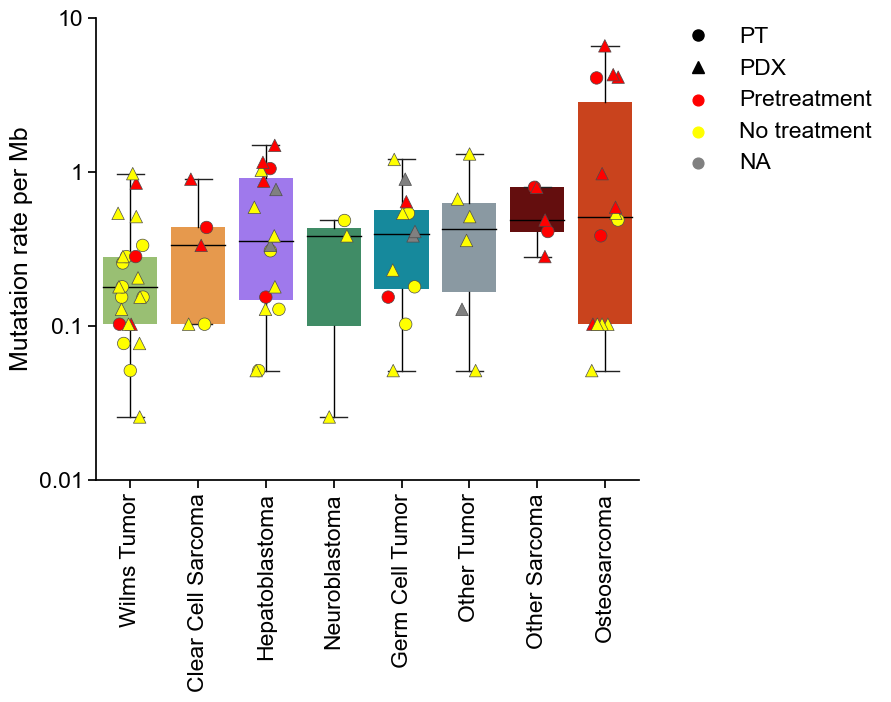

In [9]:
sns.set_context('notebook', font_scale = 1.5, rc = {'lines.linewidth':1}) 
fig = plt.figure(figsize=(7,6))

sns.boxplot(data = dt, x = 'Tumor group2', y = 'Mutations rate',  order=cancer_ranking, palette=color_ranking,
            fliersize=0, 
            boxprops={'edgecolor': 'black', 'alpha':1,'linewidth':0, },  # 'facecolor':'None'
                medianprops={'color':'black', 'alpha':1, 'linewidth':1,},
                whiskerprops={'linewidth':1, 'color':'black','alpha' : 1},
)
'''sns.swarmplot(data = dt, x = 'Tumor group', y = 'Mutations rate', size = 10, linewidth=0.5, #color = '.2',
             hue = 'Tumor group', order =cancer_ranking,hue_order =cancer_ranking ,palette=color_ranking
             )'''
g1 = sns.stripplot(data = dt[dt['Datatype'] == 'PT'], x = 'Tumor group2', y = 'Mutations rate', size = 9, linewidth=.5, #color = '.2',
             hue = 'Therapy prior to PDX collection', order =cancer_ranking, marker = 'o',
              palette = ['red','yellow','gray'], hue_order=['Pretreatment', 'No treatment','NA'],
              jitter = 0.2, alpha = 1
             )
g1 = sns.stripplot(data = dt[dt['Datatype'] == 'PDX'], x = 'Tumor group2', y = 'Mutations rate', size = 9, linewidth=.5, #color = '.2',
             hue = 'Therapy prior to PDX collection', order =cancer_ranking, marker = '^',
              palette =['red','yellow','gray'], hue_order=['Pretreatment','No treatment', 'NA'],
            jitter = 0.2, alpha = 1
             )


sns.despine()
plt.xlabel('')
plt.ylabel('Mutataion rate per Mb')
plt.xticks(rotation = 90)
plt.yticks([-2, -1, 0,1], [0.01, 0.1, 1, 10])




handles, labels = g1.get_legend_handles_labels()
circle = mpl.lines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=8, label='PT')
triangle = mpl.lines.Line2D([], [], color='black', marker='^', linestyle='None',
                          markersize=8, label='PDX')
#plt.legend(merge_same=True, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,  frameon = False)

plt.legend(handles= [ circle , triangle] + handles[:3] , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon = False)


### Muts overlapped in PT-PDX

In [10]:
def add_mutation_type(dt):
    k = []
    for i in range(len(dt)):
        if dt.iloc[i]['Sum'] ==2 :
            k.append('Both')
        elif dt.iloc[i]['PDX'] ==1 :
             k.append('PDX only')
        elif dt.iloc[i]['PT'] ==1 :
             k.append('PT only')
    dt['Type'] = k
    return dt

#### PT_vs_PDX

In [11]:
snp = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/3.somatic_mutations/Final.somatic_mutations.maf')
snp = snp.fillna('NA')
snp['Final_clonality'] = snp['Final_clonality'].fillna('NA')

snp['PatientID'] = snp['ID'].str.split('_').str[0]
snp['Datatype'] = snp['ID'].str.split('_').str[1]



In [12]:
# select samples with paired PT or PDX
paired_id = ['498','529','560','585','655','668','1753','1754','1792','1795','1823','1826','1913','1922','1932','1957','1959','1979','2035','2050','2264','1739','1763','1907','54']

df = snp.reset_index().drop('index', axis = 1)
k = []
for i in range(len(df)):
    if str(df.iloc[i]['PatientID']) in paired_id:
        k.append(i)
df = df.T[k].T

In [13]:
dt = df.groupby(['Hugo_Symbol','Variant_Classification', 'Chromosome', 'Start_Position', 'Reference_Allele','Tumor_Seq_Allele2' ,'PatientID', 'Datatype','Tumor group']).count()[['ID']].unstack('Datatype').fillna(0)
print(len(dt))
dt.columns = ['PDX', 'PT']
dt['Sum'] = dt.T.sum()
dt = dt.sort_values('Sum').reset_index()

dt = add_mutation_type(dt)
dt 

639


,Hugo_Symbol,Variant_Classification,Chromosome,Start_Position,Reference_Allele,Tumor_Seq_Allele2,PatientID,Tumor group,PDX,PT,Sum,Type
0,GABRA6,Silent,chr5,161701641,C,A,585,Hepatoblastoma,1.0,0.0,1.0,PDX only
1,SLC35F4,Nonsense_Mutation,chr14,57589413,C,T,585,Hepatoblastoma,1.0,0.0,1.0,PDX only
2,MUC16,Missense_Mutation,chr19,8977970,G,T,1957,Hepatoblastoma,1.0,0.0,1.0,PDX only
3,GGN,Missense_Mutation,chr19,38385484,G,A,1957,Hepatoblastoma,1.0,0.0,1.0,PDX only
4,GCAT,Missense_Mutation,chr22,37815494,G,A,1795,Germ Cell Tumor,1.0,0.0,1.0,PDX only
...,...,...,...,...,...,...,...,...,...,...,...,...
634,HTR1B,Silent,chr6,77462288,G,A,1792,Osteosarcoma,1.0,1.0,2.0,Both
635,HTN1,Missense_Mutation,chr4,70053076,TA,-,1792,Osteosarcoma,1.0,1.0,2.0,Both
636,HSPA5,Missense_Mutation,chr9,125241036,C,T,1792,Osteosarcoma,1.0,1.0,2.0,Both
637,PCDHA7,Missense_Mutation,chr5,140836472,A,C,1792,Osteosarcoma,1.0,1.0,2.0,Both


##### Similarity bar plot

In [14]:
dk = dt.groupby(['PatientID', 'Type','Tumor group']).count()[['Sum']].unstack('Type').fillna(0)
dk.columns = ['Both', 'PDX only', 'PT only']

dk['Similarity'] = dk['Both']/(dk['Both'] + dk['PT only'] + dk['PDX only'])
dk['PT mutations pass to PDX'] = dk['Both']/(dk['Both'] + dk['PT only'])
dk['PDX mutations inherit from PT'] = dk['Both']/(dk['Both'] + dk['PDX only'])
print(dk['Similarity'].median() )
dk.sort_values('Similarity')
dk = dk.reset_index().set_index('PatientID').sort_values('Both', ascending=False)
dk.sort_values('Similarity', ascending = False)

0.52


,Tumor group,Both,PDX only,PT only,Similarity,PT mutations pass to PDX,PDX mutations inherit from PT
PatientID,,,,,,,
498,Hepatoblastoma,5.0,0.0,0.0,1.000000,1.000000,1.000000
54,ERMS,31.0,0.0,0.0,1.000000,1.000000,1.000000
1754,Clear Cell Sarcoma,4.0,0.0,0.0,1.000000,1.000000,1.000000
1792,Osteosarcoma,158.0,3.0,1.0,0.975309,0.993711,0.981366
655,Wilms Tumor,10.0,1.0,0.0,0.909091,1.000000,0.909091
1907,Pleomorphic Sarcoma,16.0,3.0,0.0,0.842105,1.000000,0.842105
1739,Hepatoblastoma,12.0,3.0,0.0,0.800000,1.000000,0.800000
668,Wilms Tumor,3.0,1.0,0.0,0.750000,1.000000,0.750000
1826,Germ Cell Tumor,18.0,3.0,3.0,0.750000,0.857143,0.857143


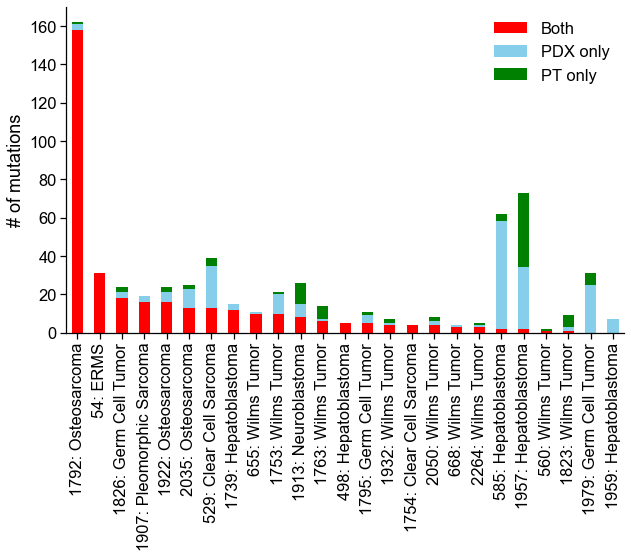

In [15]:
sns.set_context('notebook',font_scale = 1.5, rc = {'lines.linewidth':1}) #设置文本

g = dk[['Both', 'PDX only','PT only']].plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], figsize= (10,6))
plt.legend (loc = 0, ncol = 1)
plt.xlabel('')
plt.ylabel('# of mutations')
plt.xticks(ticks = list(range(len(dk))), labels = dk.reset_index()['PatientID'] +': ' +  dk.reset_index()['Tumor group'])
sns.despine()
plt.legend(frameon = False)


##### Sankey plot

In [16]:
indir = "../ggplot_input (mut_clonality)"
outdir = "/home/UTHSCSA/hef/2.Project/5.PDX/3.plot/4.somatic_mutation/mutation_clonality"

In [17]:
%%capture
%load_ext rpy2.ipython

In [18]:
#All sample
dt = pd.read_table(indir +'/Allsample.txt', sep = '\t')
dt

,Type,Datatype,Clonality,Number
0,Clonal_Clonal,PT,Clonal,272
1,Clonal_Clonal,PDX,Clonal,272
2,Clonal_Subclonal,PT,Clonal,19
3,Clonal_Subclonal,PDX,Subclonal,19
4,Subclonal_Clonal,PT,Subclonal,8
5,Subclonal_Clonal,PDX,Clonal,8
6,Subclonal_Subclonal,PT,Subclonal,8
7,Subclonal_Subclonal,PDX,Subclonal,8
8,PT_clonal_only,PT,Clonal,40
9,PT_clonal_only,PDX,Clonal,0


In [19]:
%%R
library(ggplot2)
library(ggalluvial)

In [20]:
%R -i dt  -i outdir

In [21]:
%%R 
colorfill <- c("salmon", "lightpink", "plum2", "lightgoldenrodyellow", "lightgoldenrodyellow", "lightcyan", "lightcyan", "steelblue1","palegreen","skyblue")
dt$Datatype <- factor(dt$Datatype, levels=c("PT","PDX"))

new_label = paste0(dt$Type,': ',dt$Number)
new_label

 [1] "Clonal_Clonal: 272"     "Clonal_Clonal: 272"     "Clonal_Subclonal: 19"  
 [4] "Clonal_Subclonal: 19"   "Subclonal_Clonal: 8"    "Subclonal_Clonal: 8"   
 [7] "Subclonal_Subclonal: 8" "Subclonal_Subclonal: 8" "PT_clonal_only: 40"    
[10] "PT_clonal_only: 0"      "PDX_clonal_only: 0"     "PDX_clonal_only: 140"  
[13] "PT_subclonal_only: 57"  "PT_subclonal_only: 0"   "PDX_subclonal_only: 0" 
[16] "PDX_subclonal_only: 52"


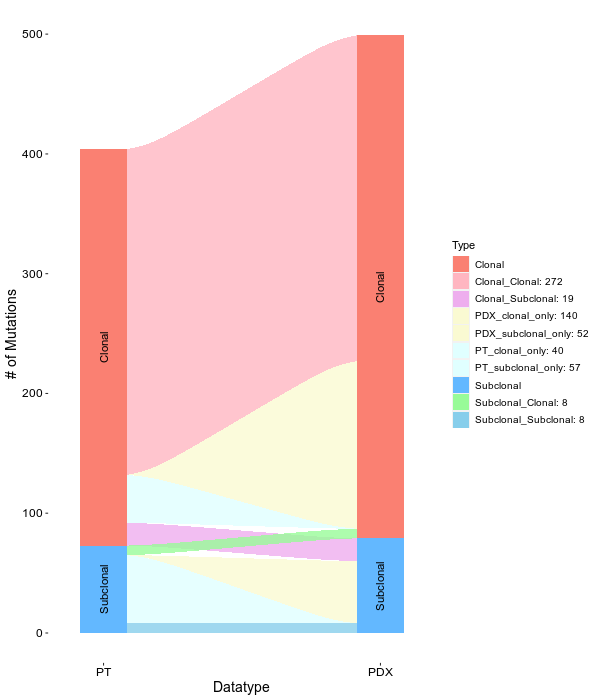

In [22]:
%%R  -w 600 -h 700
flow = ggplot( data = dt, aes(x = Datatype, stratum = Clonality, alluvium = Type, y = Number)) +  
        geom_alluvium(aes(fill = Type), alpha = 0.8, width=1/6, knot.pos = 0.1) + 
        geom_stratum(aes(fill = Clonality), width=1/6, color = FALSE ) +   
        geom_text(stat = "stratum", aes(label = after_stat(stratum)), reverse = TRUE, angle=90, size = 4) + 
        scale_x_discrete(limits = c("PT", "PDX"), expand = c(.1, .1)) + 
        #change color & legend label
        scale_fill_manual(values = colorfill,  labels=c("Clonal", new_label[1], new_label[3], new_label[12], new_label[16] ,new_label[9], new_label[13], "Subclonal", new_label[5], new_label[7])) +
        #set fontsize and remove background
        theme(axis.text=element_text(size=12, colour = 'black'), axis.title=element_text(size=14), legend.text=element_text(size=10), panel.background = element_blank()) +
        ylab("# of Mutations") 

flow

### Mutation signature

In [20]:
data = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/3.somatic_mutations/Final.somatic_mutations.maf')
weight = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/5.reseq/Signature/deconstructSig/weight.txt', sep = '\t', index_col=0)
weight

,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,SBS7d,...,SBS85,SBS86,SBS87,SBS88,SBS89,SBS90,SBS91,SBS92,SBS93,SBS94
1981_PDX_WES,0.0,0.0,0.0,0.0,1.995920e-08,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.038909,0.024562,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1792_PDX_WES,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.053340,...,0.0,0.014051,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1792_PT_WES,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.056589,...,0.0,0.013588,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
556_PDX_WES,0.0,0.0,0.0,0.0,1.980101e-08,0.0,0.038466,0.000000,0.040233,0.022042,...,0.0,0.000000,0.094413,0.0,0.0,0.0,0.0,0.040434,0.0,0.040144
585_PDX_WES,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511_PDX_WES,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.459412,0.000000,0.000000,...,0.0,0.000000,0.540588,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
466_PDX_WES,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
560_PDX_WES,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
530_PDX_WES,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [11]:
# selected sample
a = data.groupby('ID').count().sort_values('Chromosome', ascending=False).head(44).index #muts > 10
b = weight[weight.T[(weight.T > 0.25)].any()].index # contribution > 0.25
select_sample = [i for i in a if i in (list(set(a) & set(b)))]

dt = weight.T[select_sample].T
select_sig = list(dt.max()[dt.max() > 0.25].index)
dt = weight.T[select_sample].T[[i for i in select_sig if i not in ['SBS58'] ]]

In [12]:
msi = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/z.result/MSI_score.v2.txt', sep  = '\t', index_col=0)

In [13]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

cmap = cm.Purples
norm = Normalize(vmin=-2,  vmax=10)

In [18]:
sig_ranking = [ 'SBS15','SBS31','SBS35','SBS87']

sample_ranking = ['1981_PDX_WES', 
                  '1792_PDX_WES',  '1792_PT_WES',
                  '585_PDX_WES', '1925_PDX_WES','560-LM_PDX_WES', 
                  '1957_PT_WES',  '1957_PDX_WES', 
                   '1979_PDX_WES', 
                  '1826_PT_WES', '1826_PDX_WES', 
                  '1907_PDX_WES',
                  '1913_PT_WES', '1922_PT_WES', 
                   '1753_PDX_WES', '1753_PT_WES',
                  '1739_PT_WES', '1739_PDX_WES', 
                  '896751_PDX_WES', '1913_PDX_WES', '1982_PDX_WES', '1763_PT_WES', '2324_PDX_WES', '29_PT_WES', '2197_PDX_WES'
                 ]

<ipython-input-19-9d627e5dfea8>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(idx , rotation = 90)


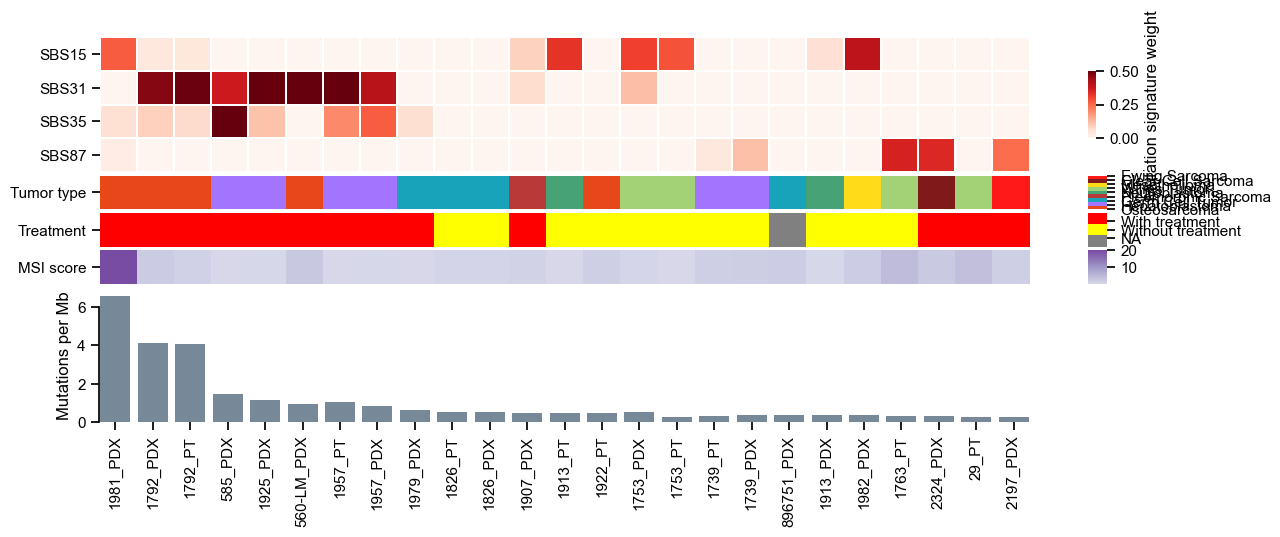

In [19]:

sns.set_context('notebook', font_scale = 1, rc = {'lines.linewidth':1}) #设置文本
fig = plt.figure(figsize=(15,5))

gs = gridspec.GridSpec(5, 2, wspace=0, hspace= 0.05, height_ratios=[4,1,1,1,4], width_ratios=[16,4]) 
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[1, :2])
ax3 = plt.subplot(gs[2, :2])
ax4 = plt.subplot(gs[3, :2])
ax5 = plt.subplot(gs[4, 0])



#signature heatmap

g = sns.heatmap(dt[sig_ranking].T[sample_ranking],  cmap = 'Reds', linewidth = 0.3, vmax = 0.5, vmin = 0, ax = ax1, 
            cbar_kws={"shrink": .5,'aspect':8,'label': 'Mutation signature weight'})
g.set_xticks([]) 


#Cancer type
dk = data.groupby('ID').first()[['Tumor group']].T[sample_ranking].T
ranking = dk['Tumor group'].unique()
cancer_camp = mpl.colors.LinearSegmentedColormap.from_list("", [color_dict2[i] for i in ranking],  N=len(ranking))
ranking_dict = dict(zip(ranking, range(len(ranking)))) #cancer type to number
dk = dk.applymap(lambda s: ranking_dict.get(s) if s in ranking_dict else s) #map string to number

g = sns.heatmap( dk.T,  ax = ax2,
            cmap=cancer_camp,  alpha = 0.9, cbar_kws={"aspect": 1.7}) # lw = 0, linecolor = '#fffdfc',
g.set_yticklabels(['Tumor type'], rotation = 0)
g.set_xticks([]) 
cbar = ax2.collections[0].colorbar
cbar.set_ticks( list(ranking_dict.values()) )
cbar.set_ticklabels( list(ranking_dict.keys()) )


#Treatment
cancer_type = mpl.colors.LinearSegmentedColormap.from_list("", ['gray','yellow','red'], N=3)
therapy = data.groupby('ID').first()[['Therapy prior to PDX collection']].T[sample_ranking].T

therapy = therapy.fillna('NA').replace('Chemotherapy', 'With treatment').replace('chemotherapy', 'With treatment').replace('No treatment', 'Without treatment').replace('no treatment', 'Without treatment').replace('Yes (unspecified)', 'With treatment')
therapy_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['gray','yellow','red'], N=3) 
g = sns.heatmap( therapy.replace('NA',0).replace('Without treatment', 1).replace('With treatment', 2).T,  ax = ax3,
            cmap=therapy_cmap,  alpha =1, cbar_kws={"aspect": 1.7})           #lw = 0.01, linecolor = '#fffdfc',
g.set_yticklabels(['Treatment'], rotation = 0)
g.set_xticks([]) 
cbar = ax3.collections[0].colorbar
cbar.set_ticks([ 0.5, 1, 1.5])
cbar.set_ticklabels(['NA','Without treatment', 'With treatment'])

#MSI
g = sns.heatmap( msi.T[sample_ranking].T[['MSI%']].T,  ax = ax4,
            cmap='Purples',  vmax = 20, center = 5, alpha = 0.7, cbar_kws={"aspect": 1.7})
g.set_yticklabels(['MSI score'], rotation = 0)
g.set_xticks([]) 



#Mutation load
mut = data.groupby('ID').count().sort_values('Chromosome', ascending=False)[['Chromosome']].T[sample_ranking].T
mut = mut/39


g = ax5.bar(mut.index, mut['Chromosome'], color='lightslategray',  width = 0.8)

ax5.set_ylim([0,7])
ax5.set_xlabel('')
ax5.set_ylabel('Mutations per Mb')
idx = [ i.split('_')[0]+'_'+i.split('_')[1] for i in sample_ranking]
ax5.set_xticklabels(idx , rotation = 90)
ax5.margins(y=0, x = 0.001)
sns.despine(top=True,     right=True,    left=False,    bottom=True, trim=True, offset=0.5, ax = ax5)


### Clonal neoantigen (PT-PDX)

In [29]:
data = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/3.somatic_mutations/Final.somatic_mutations.maf')
df = data[(data['Final_clonality'] == 'Clone') | (data['Final_clonality'] == 'Subclone')]
df = df[df['Neoantigen'] == 'Yes'].reset_index()

In [30]:
dt = df
k = []
for i in range(len(dt)):
    if str(dt.iloc[i]['PatientID']) in paired_id:
        k.append(i)
dt = dt.T[k].T

In [31]:
dt = df.groupby(['Hugo_Symbol','Variant_Classification', 'Chromosome', 'Start_Position', 'Reference_Allele','Tumor_Seq_Allele2' ,'PatientID', 'Datatype']).count()[['ID']].unstack('Datatype').fillna(0)
dt.columns = ['PDX', 'PT']
dt['Sum'] = dt.T.sum()
dt = dt.sort_values('Sum').reset_index()
dt = add_mutation_type(dt)
dt['Mut'] = dt['Chromosome'] +':'+ dt['Start_Position'].astype(str) +':'+dt['Reference_Allele']+':'+dt['Tumor_Seq_Allele2']

In [32]:
dm = pd.concat([df[['PatientID', 'Mut', 'Final_clonality']].set_index(['PatientID', 'Mut']), dt.set_index(['PatientID', 'Mut']) ] , axis = 1).reset_index()
dm = dm.groupby(['PatientID','Type','Final_clonality']).count()[['Hugo_Symbol']].unstack('Type').fillna(0)
dm.columns = ['Shared muts', 'PDX only', 'PT only']
dm['Shared muts'] = dm['Shared muts']/2

In [33]:
dt3 = dm.unstack('Final_clonality').sort_index().fillna(0)
dt3.columns = ['Clonal_shared', 'Subclonal_shared', 'Clonal_PDX_only','Subclonal_PDX_only', 'Clonal_PT_only','Subclonal_PT_only']
dt3 = dt3.T[[str(i) for i in paired_id if str(i) in list(dt3.index)]].T
dt3.index = dt3.index.astype(int)
dt3

,Clonal_shared,Subclonal_shared,Clonal_PDX_only,Subclonal_PDX_only,Clonal_PT_only,Subclonal_PT_only
PatientID,,,,,,
529,2.0,0.0,7.0,0.0,0.0,2.0
585,0.0,0.0,9.0,0.0,1.0,0.0
655,3.0,0.0,0.0,0.0,0.0,0.0
668,1.0,0.0,0.0,0.0,0.0,0.0
1753,1.5,0.5,4.0,0.0,0.0,0.0
1754,2.0,0.0,0.0,0.0,0.0,0.0
1792,46.5,1.5,2.0,3.0,4.0,1.0
1795,1.0,0.0,2.0,0.0,0.0,2.0
1823,1.0,0.0,1.0,0.0,2.0,0.0


##### PT vs PDX

In [34]:
dk = dt3[['Clonal_PDX_only', 'Clonal_PT_only']].reset_index().melt(id_vars = 'PatientID')
dk.columns = ['PatientID','Datatype','Neoantigen']
dk = add_cancer_info(dk, 'PatientID')
dk['PatientID'] = dk['PatientID'].astype(str)
dk

,PatientID,Datatype,Neoantigen,PDXID,Tumor Class,Tumor group2,Tumor group,Primary or Met,Gender,Age(year),Therapy prior to PDX collection
0,529,Clonal_PDX_only,7.0,529,"Clear cell sarcoma, NOS",Clear Cell Sarcoma,Clear Cell Sarcoma,primary,Female,13.0,radiation
1,585,Clonal_PDX_only,9.0,585,Hepatoblastoma,Hepatoblastoma,Hepatoblastoma,primary,Male,2.0,Chemotherapy
2,655,Clonal_PDX_only,0.0,655,Wilms tumor,Wilms Tumor,Wilms Tumor,metastatic,Male,5.0,No treatment
3,668,Clonal_PDX_only,0.0,668,Wilms tumor,Wilms Tumor,Wilms Tumor,primary,Male,4.0,No treatment
4,1753,Clonal_PDX_only,4.0,1753,"nephroblastoma, nos",Wilms Tumor,Wilms Tumor,primary,Male,10.0,No treatment
5,1754,Clonal_PDX_only,0.0,1754,"Clear cell sarcoma, NOS",Clear Cell Sarcoma,Clear Cell Sarcoma,primary,Male,1.0,No treatment
6,1792,Clonal_PDX_only,2.0,1792,Metastatic Osteosarcoma,Osteosarcoma,Osteosarcoma,primary,Female,17.0,Chemotherapy
7,1795,Clonal_PDX_only,2.0,1795,Mixed germ cell tumor,Germ Cell Tumor,Germ Cell Tumor,primary,Male,17.0,No treatment
8,1823,Clonal_PDX_only,1.0,1823,"Nephroblastoma, NOS (Wilms tumor)",Wilms Tumor,Wilms Tumor,primary,Female,5.0,No treatment
9,1826,Clonal_PDX_only,1.0,1826,Mixed germ cell tumor,Germ Cell Tumor,Germ Cell Tumor,primary,Male,14.0,No treatment


In [35]:
group23

['1913', '529', '1753', '1932', '585', '1957', '1823']

In [36]:
X =  'Datatype'
Y = 'Neoantigen'
hue = 'Datatype'
#group = group1
#pal = ['gray'] #group1

group = group23
pal = ['green','purple','green','green', 'purple','green','purple'] #group23



dt_input = dk.set_index(['PatientID','Datatype','Tumor group'])[[Y]].unstack('Datatype').dropna(axis = 0, how = "all")
dt_input.columns = ['PDX', 'PT']

dt_input = dt_input.reset_index().set_index('PatientID')
dt_input.index = dt_input.index.astype(str)
dt_input = dt_input.T[[i for i in dk.PatientID.unique() if( i in group) & (i not in ['2264','498','560']) ]].T
#print(dt_input)
dt_input = dt_input.reset_index().sort_values('PatientID')
dt_input = dt_input.melt(id_vars = ['PatientID', 'Tumor group'], value_name=Y, var_name = X)

hue_order=list(dt_input.PatientID.unique())
cancer_ranking = dt_input[['PatientID', 'Tumor group']].drop_duplicates().set_index('PatientID').T[hue_order].T['Tumor group'].to_list()


PDX v.s. PT: t-test paired samples, P_val=2.934e-02 stat=2.846e+00


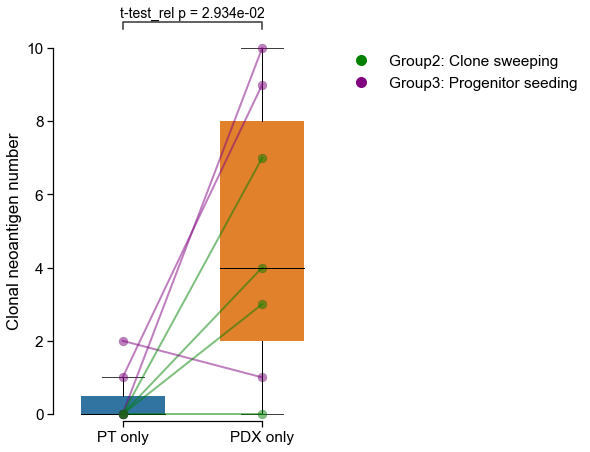

In [37]:
sns.set_context('notebook', font_scale = 1.4, rc = {'lines.linewidth':1}) #设置文本
fig = plt.figure(figsize=(5,7))


p = sns.boxplot(data = dt_input, x = X, y = Y, order = ['PT','PDX'],
                boxprops={'edgecolor': 'black', 'alpha':1,'linewidth':0, },  # 'facecolor':'None'
                medianprops={'color':'black', 'alpha':1, 'linewidth':1,},
                whiskerprops={'linewidth':1, 'color':'black','alpha' : 1},
                showfliers=False, width=0.6, 
           )
g = sns.pointplot(data = dt_input, y = Y, x = X,  order = ['PT','PDX'],
                  hue='PatientID', hue_order=hue_order, palette = pal,
                  #palette=color_ranking, 
               scale=2, 
             )
# set alpha for marker (index 0) and for the rest line (indeces 3-6) 
plt.setp(g.collections, alpha=0.5, edgecolor ='.2', linewidth=.25) #for the markers
plt.setp(g.lines[10:], alpha=.5,linewidth=2)       #for the lines, ignore boxplot's line
plt.xlabel('')
g.set_xticklabels(labels=['PT only', 'PDX only'])
plt.ylim(-0.2,10.2)
from statannot import add_stat_annotation
add_stat_annotation(p, data = dt_input[[X, Y]].fillna(0), x = X, y = Y,   #order =  ['PT','PDX'],
                    box_pairs=[('PT',  'PDX')],
                    test='t-test_paired', text_format='full', loc='outside', verbose=2,  comparisons_correction=None,
                    fontsize='small')




import matplotlib.lines as mlines
legend_elements = []
legend_elements.append(mlines.Line2D([], [], color=mpl.colors.to_hex('gray'), marker='o', linestyle='None', markersize=10, label='Group1: Clone retention'))
legend_elements.append(mlines.Line2D([], [], color=mpl.colors.to_hex('green'), marker='o', linestyle='None', markersize=10, label='Group2: Clone sweeping'))
legend_elements.append(mlines.Line2D([], [], color=mpl.colors.to_hex('purple'), marker='o', linestyle='None', markersize=10, label='Group3: Progenitor seeding'))

sns.despine(trim = True)
g.set_ylabel('Clonal neoantigen number')


#plt.legend(legend_elements[:1],['Group1: Clone retention'] , bbox_to_anchor = (1.5,1), frameon=False)
#plt.savefig(outdir+'/Neoantigen_number.clonal.group1.boxplot.'+time+'.pdf', format='pdf', dpi = 600,  bbox_inches='tight') 


plt.legend(legend_elements[1:],['Group2: Clone sweeping','Group3: Progenitor seeding'] , bbox_to_anchor = (1,1), frameon=False)
#plt.savefig(outdir+'/Neoantigen_number.clonal.group23.boxplot.'+time+'.pdf', format='pdf', dpi = 600,  bbox_inches='tight') 


### Different Groups comparison

In [38]:
data = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/Neoantigen_rate.txt', sep = '\t', index_col=0)
data['Age'] = data['Age'].astype(int)
data['PatientID'] = data['PatientID'].astype(str)
data['PT'] = data['Both'] + data['PT only']
data['PDX'] = data['Both'] + data['PDX only']

data = data.sort_values(['Group', 'Both'], ascending=[True, False])

data['Group_old'] = data['Group'].str.split(':').str[0]

#### Barplot of PT-diversity

In [39]:
mut = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/3.somatic_mutations/Final.somatic_mutations.maf')
mut = mut[(mut['PT_PDX'] == 'PT-PDX') ]
mut = mut.groupby([ 'Hugo_Symbol', 'PatientID', 'Datatype']).count()[['Chromosome']].unstack('Datatype').fillna(0).reset_index() 

In [40]:
data = data[data['Group'].notna()]

[Text(0, 0.5, 'Tumor type')]

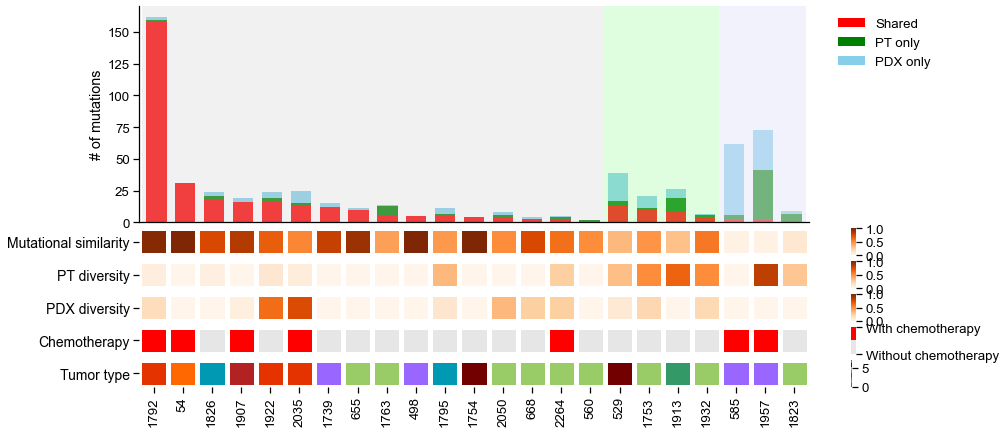

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set_context('notebook', font_scale = 1.2, rc = {'lines.linewidth':1}) #设置文本
fig = plt.figure(figsize=(15,7))

gs = gridspec.GridSpec(6, 2, wspace=0, hspace= 0.1, height_ratios=[4,0.5,0.5,0.5,0.5,0.5], width_ratios=[16,4]) 
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, :2])
ax3 = plt.subplot(gs[2, :2])
ax4 = plt.subplot(gs[3, :2])
ax5 = plt.subplot(gs[4, :2])
ax6 = plt.subplot(gs[5, :2])

g = data[['Both','PT only', 'PDX only']].plot(kind='bar', stacked=True, width= 0.7, color=['red',  'green', 'skyblue'],ax = ax1)
sns.despine()
g.set(xticks=[], xlabel = None, ylabel = '# of mutations') 
handles, labels = g.get_legend_handles_labels()
g.legend(handles, ['Shared', 'PT only', 'PDX only'], bbox_to_anchor=(1.2, 1), frameon=False)

#add background
g.axvspan(-0.5, 15.5, facecolor='lightgray', alpha=0.3, lw=0)
g.axvspan(15.5, 19.5, facecolor='palegreen', alpha=0.3, lw=0)
g.axvspan(19.5, 22.5, facecolor='lavender', alpha=0.5, lw=0)


#Mutational similarity
g = sns.heatmap(
            data[['Mut_similarity']].astype(float).T,
            cmap='Oranges', cbar_kws={"aspect": 5}, linewidths = 5,
             xticklabels = False, ax = ax2,
            vmax = 1, vmin = 0, center = 0.5
        )
g.set(xlabel=None)
g.set_yticklabels(['Mutational similarity'], rotation = 0, fontsize = 14) 
colorbar = g.collections[0].colorbar
colorbar.set_ticks([0,0.5,1])
#colorbar.set_ticklabels(['0%','50%','100%'])

#Treatment
g = sns.heatmap(
            data[['Treatment']].replace('No treatment', 0).replace('radiation', 0).replace('Chemotherapy', 1).astype(int).T,
            cmap=['.9','red'], cbar_kws={"aspect": 5}, linewidths =5 , #pl.colors.ListedColormap(sns.color_palette('Reds',2))
             xticklabels = False, ax = ax5,
            vmax = 1,  vmin = 0, center = 0.5
        )
g.set(xlabel=None)
g.set_yticklabels(['Chemotherapy'], rotation = 0, fontsize = 14) 
colorbar = g.collections[0].colorbar
colorbar.set_ticks([0,1,2])
colorbar.set_ticklabels(['Without chemotherapy', 'With chemotherapy'])

#PT subclonal fraction
g = sns.heatmap(
            data[['PT_subclone_pct']].astype(float).T,
            cmap='Oranges', cbar_kws={"aspect": 5}, linewidths = 5,
             xticklabels = False, ax = ax3,
            vmax = 1, vmin = 0, 
        )
g.set(xlabel=None)
g.set_yticklabels(['PT diversity'], rotation = 0, fontsize = 14) 
colorbar = g.collections[0].colorbar
colorbar.set_ticks([0,0.5,1])

#PDX subclonal fraction
g = sns.heatmap(
            data[['PDX_subclone_pct']].astype(float).T,
            cmap='Oranges', cbar_kws={"aspect": 5}, linewidths = 5,
             xticklabels = False, ax = ax4,
            vmax = 1, vmin = 0, 
        )
g.set(xlabel=None)
g.set_yticklabels(['PDX diversity'], rotation = 0, fontsize = 14) 
colorbar = g.collections[0].colorbar
colorbar.set_ticks([0,0.5,1])



#Cancer type
cancer = data.set_index('PatientID')[['Tumor group']]
ranking = cancer['Tumor group'].unique()
cancer_camp = mpl.colors.LinearSegmentedColormap.from_list("", [color_dict2[i] for i in ranking],  N=len(ranking))
ranking_dict = dict(zip(ranking, range(len(ranking)))) #cancer type to number
cancer = cancer.applymap(lambda s: ranking_dict.get(s) if s in ranking_dict else s) #map string to number

g = sns.heatmap( cancer.T, cmap=cancer_camp, ax = ax6,
               linewidths = 5
            ) 
g.set_xlabel('')
g.set_yticklabels(['Tumor type'], rotation = 0, fontsize = 14) 

